In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os

path = os.listdir('C:/Users/Vamsi/Desktop/retinopathy-dataset-master/Training/')
classes = {'nosymptoms':0, 'symptoms':1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/Vamsi/Desktop/retinopathy-dataset-master/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (300,300))
        X.append(img)
        Y.append(classes[cls])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
np.unique(Y)

array([0, 1])

In [7]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [8]:
X.shape

(1222, 300, 300)

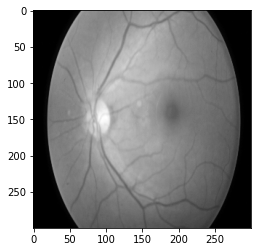

In [9]:
plt.imshow(X[0], cmap='gray')

In [10]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 90000)

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((977, 90000), (245, 90000))

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [15]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [16]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [17]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.9754350051177073
Testing Score: 0.9061224489795918


In [19]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.8659160696008188
Testing Score: 0.8367346938775511


In [20]:
pred = sv.predict(xtest)
np.where(ytest!=pred)

(array([  1,   2,   6,  14,  29,  32,  36,  37,  41,  42,  46,  50,  51,
         52,  68,  89,  90, 104, 112, 117, 128, 132, 138, 151, 153, 169,
        170, 172, 176, 179, 184, 192, 220, 222, 229, 230, 232, 238, 239,
        242], dtype=int64),)

In [21]:
pred[37]

1

In [22]:
ytest[37]

0

In [23]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

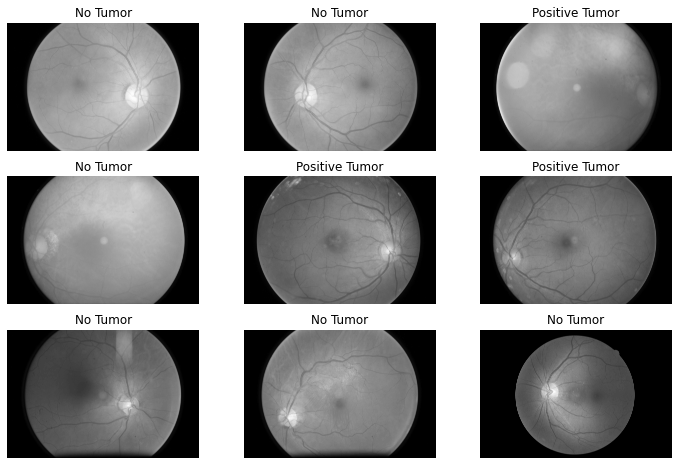

In [25]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/Vamsi/Desktop/retinopathy-dataset-master/Testing/')
c=1
for i in os.listdir('C:/Users/Vamsi/Desktop/retinopathy-dataset-master/Testing/nosymptoms/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/Vamsi/Desktop/retinopathy-dataset-master/Testing/nosymptoms/'+i,0)
    img1 = cv2.resize(img, (300,300))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

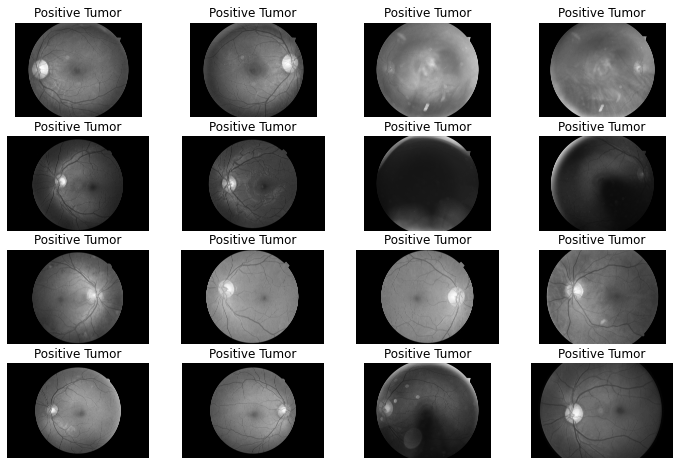

In [26]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/Vamsi/Desktop/retinopathy-dataset-master/Testing/')
c=1
for i in os.listdir('C:/Users/Vamsi/Desktop/retinopathy-dataset-master/Testing/symptoms/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/Vamsi/Desktop/retinopathy-dataset-master/Testing/symptoms/'+i,0)
    img1 = cv2.resize(img, (300,300))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1